<a href="https://colab.research.google.com/github/sylviewn/AWS-DevOps-Project/blob/master/sylvie_wette_Assignment_Project_1_Predict_Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

I would suggest a combination of Exploratory Data Analysis (EDA), preprocessing, feature engineering, model selection, and evaluation.
With EDA, i will :  * Understand Data better
                    * Visualize the dataset
                    * find Statistical Summary
      
With Data Preprocessing: I will
                    * Handle Imbalanced Data (quality rating)
                    * HandleOutliers

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

Physicochemical Features:
         Fixed Acidity Volatile Acidity Citric Acid Residual Sugar Chlorides Free Sulfur Dioxide (SO2): Total Sulfur Dioxide Density pH Sulphates Alcohol Quality

Target Variable: Quality

This dataset comes from research conducted on samples of the Portuguese "Vinho Verde" wine and was collected by:

Physicochemical Tests:
      Each physicochemical property (like acidity, pH, sugar, alcohol content, etc.) is generated by lab analysis and measured using standard wine testing methods.

Expert Tasting:
      The quality rating (target variable) is determined by human experts who taste and rate the wine.

Public Databases and Repositories:
       Repositories like UCI Machine Learning Repository.

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

This dataset comes from research conducted on samples of the Portuguese "Vinho Verde" wine

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

In [ ]:
#Let check the  shape of the dataset,  the data types of the features and perform necessary preliminary steps to understand the data better.
import pandas as pd

# Reload the dataset due to code execution state reset
red_wine = pd.read_csv("/content/winequality-red.csv")

# Check the shape of the dataset
data_shape = red_wine.shape

# Check the datatypes of the features
data_types = red_wine.dtypes

# Basic statistical summary
statistical_summary = red_wine.describe()

data_shape, data_types, statistical_summary




((1599, 12),
 fixed acidity           float64
 volatile acidity        float64
 citric acid             float64
 residual sugar          float64
 chlorides               float64
 free sulfur dioxide     float64
 total sulfur dioxide    float64
 density                 float64
 pH                      float64
 sulphates               float64
 alcohol                 float64
 quality                   int64
 dtype: object,
        fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    1599.000000       1599.000000  1599.000000     1599.000000   
 mean        8.319637          0.527821     0.270976        2.538806   
 std         1.741096          0.179060     0.194801        1.409928   
 min         4.600000          0.120000     0.000000        0.900000   
 25%         7.100000          0.390000     0.090000        1.900000   
 50%         7.900000          0.520000     0.260000        2.200000   
 75%         9.200000          0.640000     0.420000        2.600000   

 Data Types:

    All physicochemical features (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol) are of type float64.
    The target variable, 'quality', is of type int64

    The count row confirms there are 1,599 entries for each feature, indicating there are no missing values.

    The mean quality rating is approximately 5.64, with a standard deviation of about 0.81, indicating most wines have a quality rating around 5 or 6.

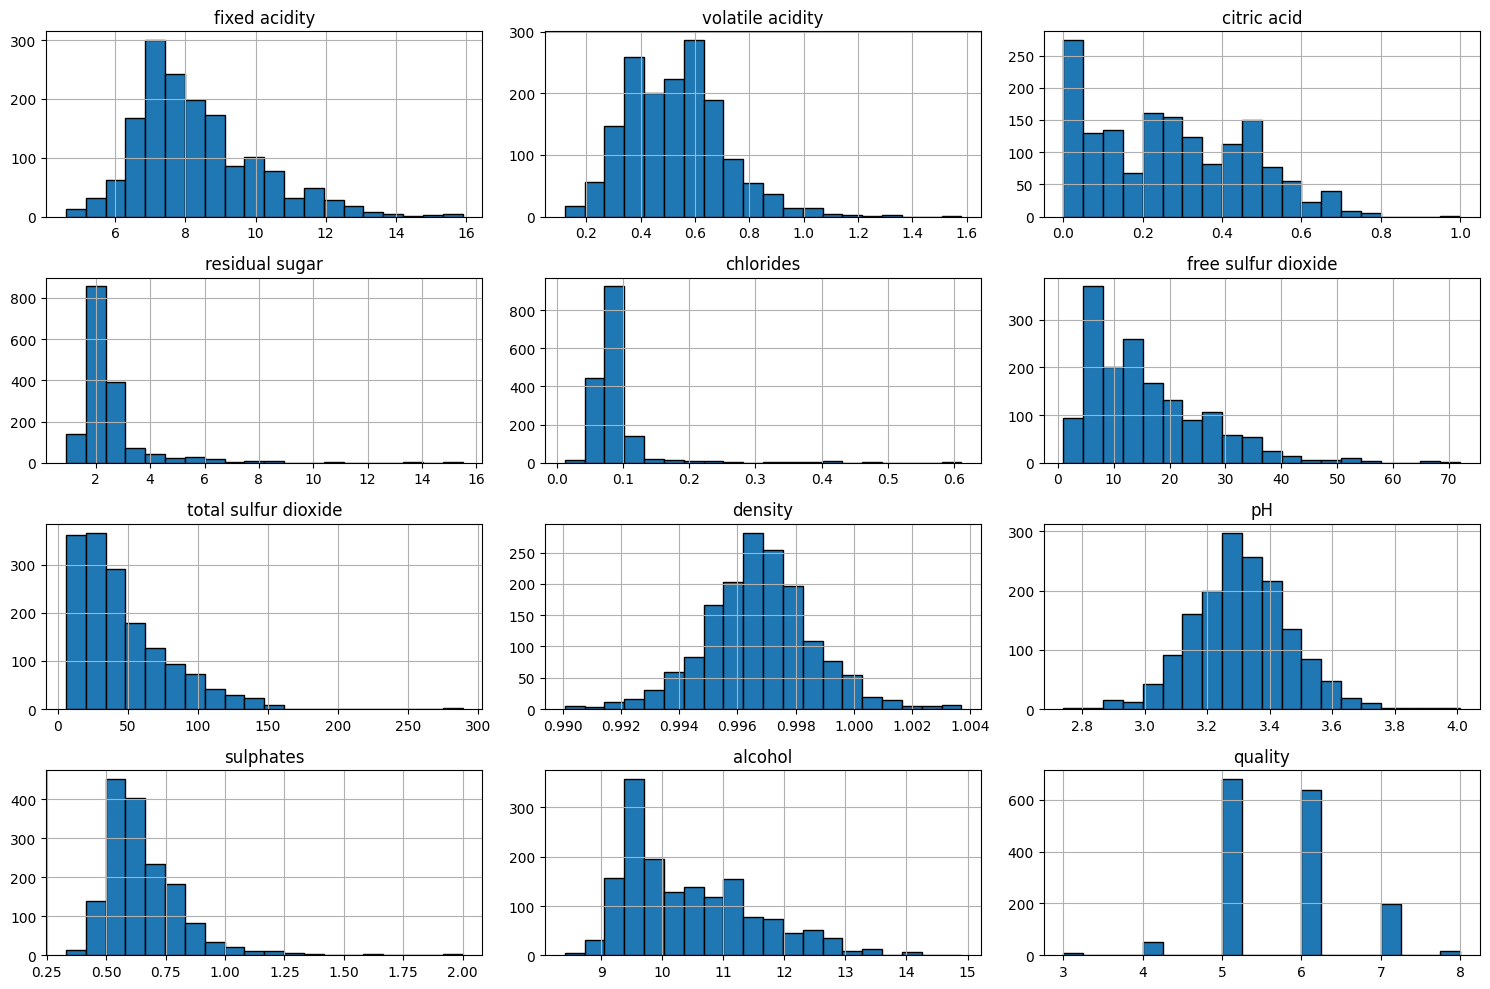

In [ ]:
#data Visualization

import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw a histogram for each feature
for i, feature in enumerate(red_wine.columns):
    plt.subplot(4, 3, i + 1)
    red_wine[feature].hist(bins=20, edgecolor='black')
    plt.title(feature)

plt.tight_layout()
plt.show()


The histograms provide a visual representation of the distribution of each feature in the dataset, including the target variable 'quality'.


### Data Preparation

###Check for missing values and handle if any
The count row confirms there are 1,599 entries for each feature, indicating there are no missing values.


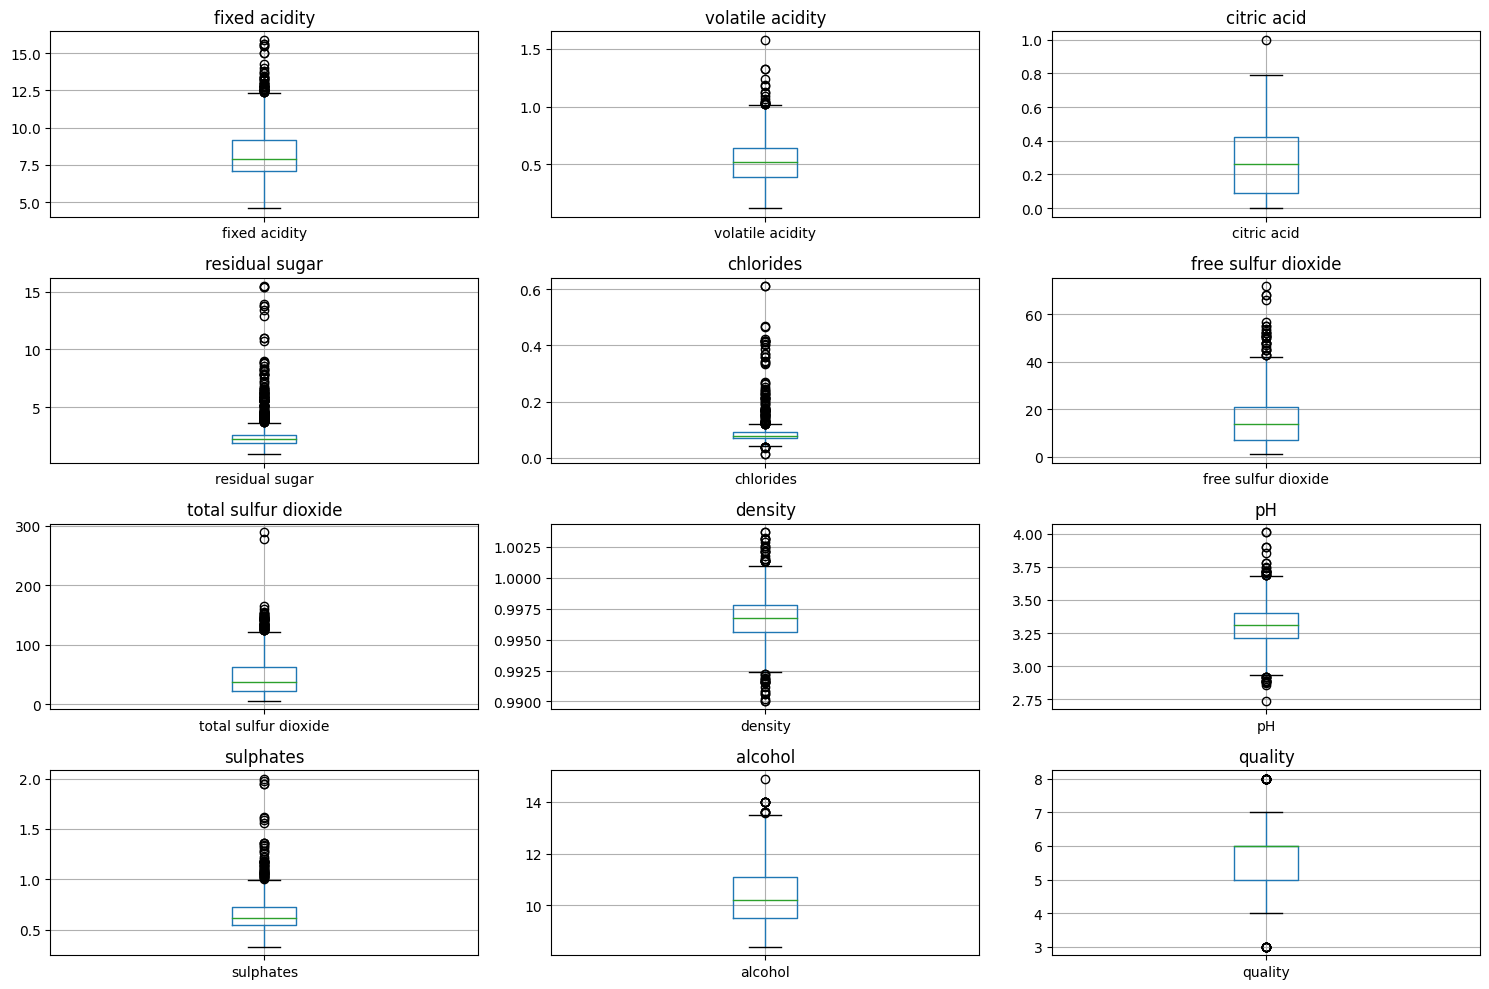

In [ ]:
#Check for outliers if any and handle them
#I will use Boxplot Analysis to visualiz boxplots for each feature to identify outliers

import pandas as pd
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw a boxplot for each feature
for i, feature in enumerate(red_wine.columns):
    plt.subplot(4, 3, i + 1)
    red_wine.boxplot([feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


There are presence of outliers in several features such as fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, and sulphates. These outliers could be the result of the skewness seen above on sulfates, alcoohol,citric acid etc.

The distribution of the dataset is seen on on the histogram plot above

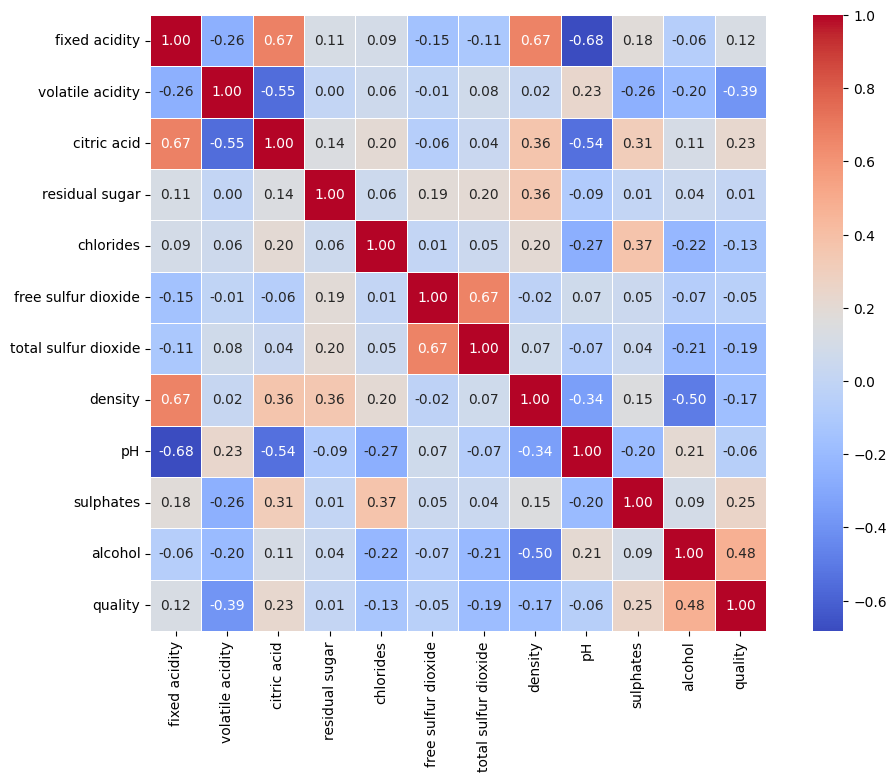

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = red_wine.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

plt.show()


 These are the features which have a correlation positive and negative with the target variable "quality"   
    
    Positive Correlation (closer to 1):
        Alcohol (0.48): The most positively correlated feature with quality, indicating that higher alcohol content is generally associated with higher quality red wine.
        Sulphates (0.25): suggesting that wines with higher sulphates content may be of better quality.
        Citric Acid (0.23): suggesting wines with more citric acid tend to have higher quality.

    Negative Correlation (closer to -1):
        Volatile Acidity (-0.39): This may indicate that wines with lower volatile acidity are generally of higher quality.
        Total Sulfur Dioxide (-0.19): suggesting that wines with lower total sulfur dioxide may be perceived as better quality.
        Density (-0.17):suggesting that wines with lower density might be associated with higher quality.
        Chlorides (-0.13): indicating that wines with lower chlorides might be associated with higher quality.

    Weak or No Correlation (closer to 0):
        Fixed Acidity, Residual Sugar, Free Sulfur Dioxide, and pH have very low correlation coefficients with quality, indicating a weak or no linear relationship with the quality of the wine.

However, it's important to remember that correlation does not imply causation, and further analysis, such as predictive modeling, is necessary to draw more definitive conclusions

Data Splitting:

    The data will be split into a training set (70%) and a testing set (30%) to ensure the model can be validated on unseen data.

Feature Scaling:

    The features will be standardized using StandardScaler to ensure that all features contribute equally to the model's performance.

### Modeling
1. Ordinary Least Squares Linear Regression
Steps:

    Fit the model using the training data.
    Predict the target variable for the test data.
    Evaluate the model's performance using appropriate metrics like R-squared, MAE (Mean Absolute Error), or RMSE (Root Mean Squared Error).

2. Ridge Regression
Steps:

    Fit the model using the training data. We will need to choose an alpha parameter for regularization strength.
    Predict the target variable for the test data.
    Evaluate the model's performance using similar metrics.

###Ordinary Least Squares Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Prepare the data for modeling
features = red_wine.iloc[:, :-1]  # All columns except 'quality'
target = red_wine['quality']      # 'quality' column

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ordinary Least Squares Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin_reg = lin_reg.predict(X_test_scaled)

# Performance Metrics
lin_reg_metrics = {
    'R2 Score': r2_score(y_test, y_pred_lin_reg),
    'RMSE': mean_squared_error(y_test, y_pred_lin_reg, squared=False)
}

lin_reg_metrics


{'R2 Score': 0.3513885332517397, 'RMSE': 0.641275971598538}

Interpret the Results:

    R-squared (R2 Score): Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values are generally better.
    RMSE (Root Mean Squared Error): Reflects the average distance between the predicted values by the model and the actual values. Lower values are generally better.

 ## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_reg = Ridge(alpha=1)  # Alpha is a hyperparameter that controls the strength of the regularization
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge_reg = ridge_reg.predict(X_test_scaled)

# Performance Metrics
ridge_reg_metrics = {
    'R2 Score': r2_score(y_test, y_pred_ridge_reg),
    'RMSE': mean_squared_error(y_test, y_pred_ridge_reg, squared=False)
}

ridge_reg_metrics

{'R2 Score': 0.35140717530073684, 'RMSE': 0.6412667559242891}

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

##Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance

In [ ]:
#Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Metrics for Ordinary Least Squares Linear Regression
r2_score_lin_reg = r2_score(y_test, y_pred_lin_reg)
rmse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg, squared=False)
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)

# Metrics for Ridge Regression
r2_score_ridge_reg = r2_score(y_test, y_pred_ridge_reg)
rmse_ridge_reg = mean_squared_error(y_test, y_pred_ridge_reg, squared=False)
mae_ridge_reg = mean_absolute_error(y_test, y_pred_ridge_reg)

# Print the metrics
print("Ordinary Least Squares Linear Regression:")
print(f"R-squared: {r2_score_lin_reg}")
print(f"RMSE: {rmse_lin_reg}")
print(f"MAE: {mae_lin_reg}\n")

print("Ridge Regression:")
print(f"R-squared: {r2_score_ridge_reg}")
print(f"RMSE: {rmse_ridge_reg}")
print(f"MAE: {mae_ridge_reg}")


Ordinary Least Squares Linear Regression:
R-squared: 0.3513885332517397
RMSE: 0.641275971598538
MAE: 0.5133956082447172

Ridge Regression:
R-squared: 0.35140717530073684
RMSE: 0.6412667559242891
MAE: 0.5134128947286668


#Compare these 3 metrics for the two models and analyze the performance
    **Ordinary Least Squares Linear Regression**
    
    R-squared: Indicates how much of the variability in wine quality is explained by the model's inputs. A higher value suggests a better fit.

    RMSE: Provides an idea of the magnitude of errors between the model's predictions and the actual values, giving more weight to larger errors. A lower value indicates a better fit.

    MAE: Similar to RMSE, it measures the average magnitude of errors but doesn't square the errors, providing a linear measure of the errors. A lower value indicates a better fit.

    
    **Ridge Regression**:
    R-squared: Like in Ordinary Least Squares, a higher value suggests a better model fit.

    RMSE: A lower value indicates a better fit, and because Ridge Regression includes regularization, it might perform better if the Ordinary Least Squares model is overfitting.

    MAE: A lower value indicates a better fit, and it provides a direct measure of the average error magnitude.

    Metric	Linear Regression	Ridge Regression


Metric	      Linear Regression	             Ridge Regression
R-squared	            0.3514	                  0.3514
RMSE	                0.6412	                  0.6412
MAE	                  0.5134	                  0.5134

These 2 models have the same output which indicate that either of them will be a good fit.

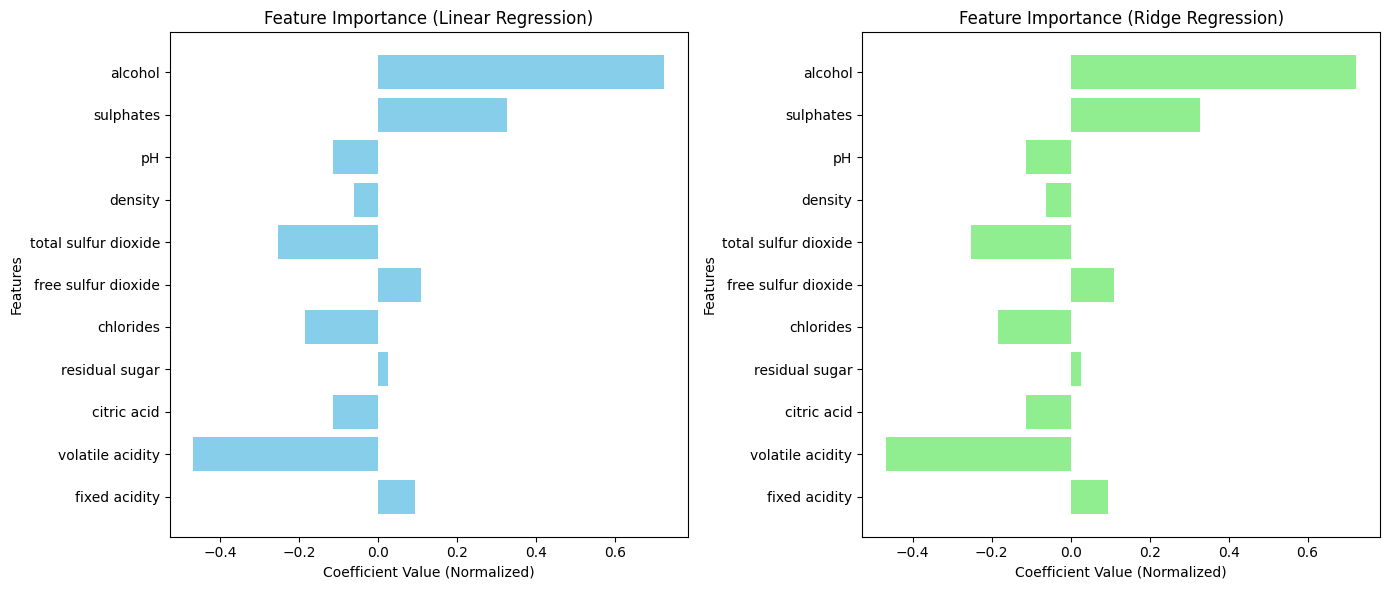

In [ ]:
#Calculate the feature importance scores for the top features that help predicting wine quality and visualize them
import numpy as np

# Feature names
feature_wine = features.columns

# Coefficients from Linear Regression
coefficients_lin_reg = lin_reg.coef_

# Coefficients from Ridge Regression
coefficients_ridge_reg = ridge_reg.coef_

# Normalize the coefficients
coefficients_lin_reg_normalized = coefficients_lin_reg / np.linalg.norm(coefficients_lin_reg)
coefficients_ridge_reg_normalized = coefficients_ridge_reg / np.linalg.norm(coefficients_ridge_reg)

# Visualization
plt.figure(figsize=(14, 6))

# Subplot for Linear Regression
plt.subplot(1, 2, 1)
plt.barh(feature_wine, coefficients_lin_reg_normalized, color='skyblue')
plt.title('Feature Importance (Linear Regression)')
plt.xlabel('Coefficient Value (Normalized)')
plt.ylabel('Features')

# Subplot for Ridge Regression
plt.subplot(1, 2, 2)
plt.barh(feature_wine, coefficients_ridge_reg_normalized, color='lightgreen')
plt.title('Feature Importance (Ridge Regression)')
plt.xlabel('Coefficient Value (Normalized)')
plt.ylabel('Features')

plt.tight_layout()
plt.show()


### Conclusion

Features as alcohol, sulphates, total sulfur dioxide, chlorides and volatile acidity are very influential in predicting wine quality